In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn import cluster

In [2]:
img = cv2.imread('/home/herry/下載/geodata.png')
img = img[:, :-200, :]

In [3]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(753, 1165, 3)


In [17]:
def pixel_cluster(img):
    X = img.reshape((-1, 1))
    k_means = cluster.KMeans(n_clusters=2)
    k_means.fit(X)

    X_cluster = k_means.labels_
    X_cluster = X_cluster.reshape(img.shape)
    X_cluster *= 50
    return X_cluster

def cluster_to_df(X_cluster):
    X_cluster = pixel_cluster(img)
    rgb_l = []
    for row in range(X_cluster.shape[0]):
        for col in range(X_cluster.shape[1]):
            rgb_l.append(X_cluster[row][col])
    df_tmp = pd.DataFrame(rgb_l)
    df_tmp['row'] = df_tmp.index // X_cluster.shape[1]
    df_tmp['col'] = df_tmp.index % X_cluster.shape[1]
    df_tmp['label'] = df_tmp[0] / 50 + df_tmp[1] / 50 * 2 + df_tmp[2] / 50 * 4
    return df_tmp

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_tmp['label'])

LabelEncoder()

In [22]:
df_tmp['label'] = le.transform(df_tmp['label'])
df_tmp['label'].value_counts()

0    404442
7    346995
2     76056
6     32429
3     15072
4      1942
1       250
5        59
Name: label, dtype: int64

In [23]:
df_tmp['color'] = np.where(df_tmp['label'].isin([0, 7, 2]), 
                           np.where(df_tmp['label'] == 0, 
                                    np.where(df_tmp['label'] == 7, 3, 2), 1), 0)

In [24]:
mask.shape

(753, 1165)

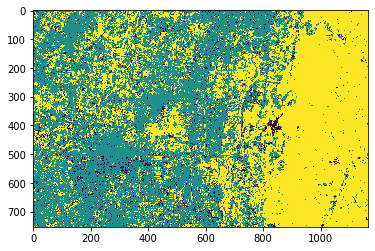

In [25]:
mask = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=['color']).values
mask = mask * 50
plt.imshow(mask)
plt.show()

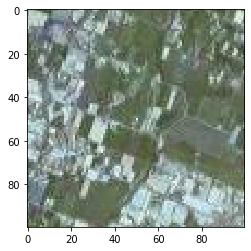

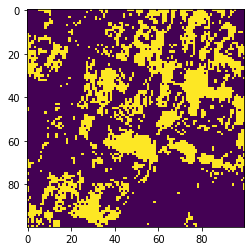

In [33]:
plt.imshow(img[:100, :100, :])
plt.show()
plt.imshow((np.where(mask==100, 1, 0)*50)[:100, :100])
plt.show()

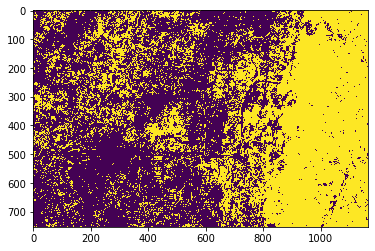

In [30]:
plt.imshow(np.where(mask==100, 1, 0)*50)
plt.show()

In [35]:
mask

array([[ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100],
       ...,
       [ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100],
       [ 50,  50,  50, ..., 100, 100, 100]])